Se instalan las blibliotecas "datasets" y "transformes"

In [ ]:
!pip install datasets
!pip install transformers==4.28.0 datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 81.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 98.0 MB/s eta 0:00:00


se importa la clase "Dataset", la función "load_dataset" y la clase "DatasetDict" de la biblioteca "datasets". También se importa la biblioteca "pandas"
se lee el excel y se guarda en la variable "data"

In [ ]:
from datasets import Dataset, load_dataset, DatasetDict
import pandas as pd
data = pd.read_excel('/content/MeIA_Rest_Mex_Sentiment_Analysis_2023_Train.xlsx', index_col=0)

 se muestran las primeras filas del DataFrame "data".

In [ ]:
data.head()

,Class
Review,
Dar mantenimiento adecuado y aclarar jurisdicción de quién es. De uno de los puentes que lleva a las cascadas cayó una turista 100 m hacia abajo en abril 2021 (obviamente falleció al caer sobre las rocas) y nunca se aclaró si la responsabilidad fue de CFE o del Municipio.,1
"yo estaba tan emocionada de este viaje, pero tras el 2-1 2 horas de autobús /viaje y 1 parada de un parque ecológico con un Cenote - me di cuenta este viaje era más de una trampa para turistas que un sitio histórico. Las ruinas en sí tienen más vendedores ladrando y haciendo ruido con sus mercancías que puede debilitar un palo. que siga usted y su guía y tratar de vender a usted mientras usted está tratando de escuchar al guía sobre lo que estás viendo. Hacía calor, y el poquito de sombra disponible fue tomado por los vendedores. La única cosa que he oído en ese viaje fue ""oferta! oferta! más barato que Wal-Mart! Casi gratis!"" que necesitan para mantener a los vendedores en una zona y para permitir a los visitantes que se acerquen a ellos, no sentimos acosados y seguido por ellos. Y por amor de Dios, acondicionar algunos lugares sombreados para sentarse allí!!! Había basura en las ruinas. . Nunca recomendaría este viaje a cualquiera. Fue un día entero y $ nunca volver. Una de las ""maravillas"" del mundo? Realmente? sólo me"" maravilla"" ¿por qué me dejaron lo que podría ser un sitio guay conseguir así crapped!.",1
"Este hotel es un engaño. De cuatro estrellas nada. Una estrella siendo generoso. Carece de higiene básica, el servicio pésimo, las habitaciones viejas, cama rota, polvo en todos lados, el desayuno impresentable, manteles sucios, sin servilletas, un desastre. Nunca más.",1
"La ducha se inundo completamente a los 5 min de usarla por una coladera sucia y el agua se transfirio al resto del baño. No habia toallas tampoco. Lo que habla de la poca higiene y poco cuidado a los detalles. El personal ni siquiera se disculpo por el incidente. Los ruidos en el pasillo se oyen muchísimo a la habitación. Mala experiencia y una noche por hab. Estandar costo casi 2000 pesos mexicanos, La decoracion se ve vieja y anticuada.",1
"Decidimos alquilar un taxi por un día para ir a Habana. El taxista recomendó y nos llevó a este restaurante para el almuerzo. Creo que él hizo esto como un montón de grupos de turistas ir allí. Para dos adultos y un niño de 7...y mi hijo de 9 años pagamos casi $150.00 canadiense para el almuerzo! No nos dimos cuenta los ""lados"" eran extra. La camarera Camino venta sugestiva ... sabiendo que los chicos es probable que se llena en el plato principal. Además, el 10% de propina era incluidos. La carne rallado que los niños lo estaba bien y abundante, pero no vale la pena los 18 dólares un plato. No podía comer la porción de langosta de mi comida como la langosta probado ... skunky ... creo que era un tipo diferente de langosta más barato que era asqueroso. Este fue un servicio de almuerzo, así que no había música en vivo ... quizás leer otras críticas, es donde este lugar es bueno para. La única cosa era la sabrosa bebida ... caña de azúcar y zumo de piña ... lo que estoy seguro de que podríamos conseguir por la mitad del precio en otro sitio. Fuera de todo nuestro viaje a Cuba, este restaurante fue la única decepción y empeoramiento del viaje! Casi pagado tanto para el almuerzo como nosotros pagamos el taxista que nos llevó desde Valedaro para todo el día!Más",1


Se divide el conjunto de datos "data" en conjuntos de entrenamiento y prueba, y muestra las longitudes de ambos conjuntos, así como la longitud total del conjunto de datos original.

In [ ]:
from sklearn.model_selection import train_test_split

train_size = 0.6
a, b = train_test_split(data, test_size=(1 - train_size), stratify=data['Class'])
print(f"Longitud del conjunto de entrenamiento ({train_size * 100}%): {len(a)}")
print(f"Longitud del conjunto de pruebas ({(1 - train_size) * 100}%): {len(b)}")
print(len(a) + len(b))


Longitud del conjunto de entrenamiento (60.0%): 10500
Longitud del conjunto de pruebas (40.0%): 7000
17500


Se crea dos objetos "Dataset" a partir de los conjuntos de datos "a" y "b", y los almacena en un objeto "DatasetDict" llamado "dataset".

In [ ]:
from datasets import Dataset, DatasetDict

ds_dict = {'train': Dataset.from_pandas(a), 'test': Dataset.from_pandas(b)}
dataset = DatasetDict(ds_dict)
dataset

DatasetDict({
    train: Dataset({
        features: ['Class', 'Review'],
        num_rows: 10500
    })
    test: Dataset({
        features: ['Class', 'Review'],
        num_rows: 7000
    })
})

Se cambia el nombre de la columna "Class" a "labels" en los conjuntos de datos de entrenamiento y prueba almacenados en el objeto "dataset".

In [ ]:
dataset = dataset.rename_column("Class", "labels")

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['labels', 'Review'],
        num_rows: 10500
    })
    test: Dataset({
        features: ['labels', 'Review'],
        num_rows: 7000
    })
})

Se realiza una transformación en las etiquetas del conjunto de datos, restando 1 a cada valor. Luego, convierte el conjunto de datos de entrenamiento transformado en un DataFrame de Pandas.

In [ ]:
dataset = dataset.map(lambda example: {**example, "labels": example["labels"] - 1})
df = dataset["train"].to_pandas()
print(df["labels"].value_counts())


Map:   0%|          | 0/10500 [00:00<?, ? examples/s]

Map:   0%|          | 0/7000 [00:00<?, ? examples/s]

4    3150
3    2625
2    2100
1    1575
0    1050
Name: labels, dtype: int64


Se carga un tokenizador preentrenado correspondiente al modelo "roberta-base-bne" y obtiene información sobre su vocabulario.

In [ ]:
from transformers import AutoTokenizer

model_checkpoint = "BSC-TeMU/roberta-base-bne"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

vocab_size = tokenizer.vocab_size
print(vocab_size)


50262


Este código realiza la tokenización de las frases en la columna "Review" del conjunto de datos de entrenamiento, utilizando el tokenizador especificado. Luego, se crea un nuevo conjunto de datos (encoded_dataset) que contiene las frases tokenizadas.

In [ ]:
def tokenize_reviews(examples):
    return tokenizer(examples["Review"], truncation=True)

columns = dataset["train"].column_names
columns.remove("labels")
encoded_dataset = dataset.map(tokenize_reviews, batched=True, remove_columns=columns)
encoded_dataset

Map:   0%|          | 0/10500 [00:00<?, ? examples/s]

Map:   0%|          | 0/7000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 10500
    })
    test: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 7000
    })
})

In [ ]:
encoded_dataset["train"][0]

{'labels': 3,
 'input_ids': [0,
  47254,
  389,
  2845,
  313,
  4767,
  313,
  859,
  20086,
  341,
  403,
  2345,
  37831,
  66,
  1640,
  596,
  1723,
  778,
  859,
  20086,
  25944,
  68,
  771,
  7839,
  313,
  2584,
  1235,
  577,
  389,
  654,
  66,
  14772,
  470,
  3548,
  342,
  10935,
  24547,
  68,
  275,
  27288,
  1233,
  935,
  387,
  12889,
  5412,
  47429,
  328,
  529,
  9085,
  313,
  13687,
  2],
 'attention_mask': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1]}

Se crea un objeto de modelo para realizar clasificación de secuencias utilizando un modelo preentrenado cargado desde model_checkpoint, y se espera que el modelo prediga entre 5 clases diferentes.

In [ ]:
from transformers import AutoModelForSequenceClassification

num_labels = 5
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=num_labels)

Some weights of the model checkpoint at BSC-TeMU/roberta-base-bne were not used when initializing RobertaForSequenceClassification: ['lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at BSC-TeMU/roberta-base-bne and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj

Se carga la métrica F1 utilizando la función load_metric del módulo datasets y asigna el objeto de métrica resultante a la variable metric. Esto permite utilizar la métrica para evaluar el desempeño de un modelo en tareas de clasificación.

In [ ]:
from datasets import load_metric

metric = load_metric("f1")
metric

<ipython-input-14-ee0dc6f5e028>:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("f1")


Metric(name: "f1", features: {'predictions': Value(dtype='int32', id=None), 'references': Value(dtype='int32', id=None)}, usage: """
Args:
    predictions (`list` of `int`): Predicted labels.
    references (`list` of `int`): Ground truth labels.
    labels (`list` of `int`): The set of labels to include when `average` is not set to `'binary'`, and the order of the labels if `average` is `None`. Labels present in the data can be excluded, for example to calculate a multiclass average ignoring a majority negative class. Labels not present in the data will result in 0 components in a macro average. For multilabel targets, labels are column indices. By default, all labels in `predictions` and `references` are used in sorted order. Defaults to None.
    pos_label (`int`): The class to be considered the positive class, in the case where `average` is set to `binary`. Defaults to 1.
    average (`string`): This parameter is required for multiclass/multilabel targets. If set to `None`, the sco

Se carga la métrica F1 para la evaluación del modelo, define una función para calcular las métricas utilizando las predicciones y etiquetas, y retorna el resultado.

In [ ]:
import numpy as np
from datasets import load_metric

metric = load_metric("f1")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return metric.compute(predictions=predictions, references=labels, average="weighted")


In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|
    
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) y
Token is valid (permission: write).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' cr

 Se configura los argumentos de entrenamiento necesarios para entrenar un modelo utilizando la biblioteca transformers de Hugging Face. Los argumentos especifican opciones como la duración del entrenamiento, el tamaño del lote, las métricas a utilizar y las estrategias de evaluación y guardado.

In [ ]:
from transformers import TrainingArguments

model_name = model_checkpoint.split("/")[-1]

batch_size = 16
num_train_epochs=2
train_dataset = encoded_dataset["train"]
logging_steps = len(train_dataset) // (2 * batch_size * num_train_epochs)

training_args = TrainingArguments(
    output_dir="results",
    num_train_epochs=num_train_epochs,
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_steps=logging_steps,
    push_to_hub=True,
    push_to_hub_model_id=f"{model_name}-finetuned-MeIA-AnalisisDeSentimientos"
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1469: FutureWarning: `--push_to_hub_model_id` is deprecated and will be removed in version 5 of 🤗 Transformers. Use `--hub_model_id` instead and pass the full repo name to this argument (in this case rvrtdta/roberta-base-bne-finetuned-MeIA-AnalisisDeSentimientos).
  warnings.warn(


Se carga y configura un modelo preentrenado para la clasificación de secuencias. El modelo se selecciona según el nombre o la ruta proporcionada en "model_checkpoint", y se especifica el número de etiquetas esperadas en la tarea de clasificación.

In [ ]:
from transformers import AutoModelForSequenceClassification
model_name = model_checkpoint.split("/")[-1]
num_labels = 5
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=num_labels)


Some weights of the model checkpoint at BSC-TeMU/roberta-base-bne were not used when initializing RobertaForSequenceClassification: ['lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at BSC-TeMU/roberta-base-bne and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj

En esta parte del código crea un objeto Trainer que se encargará de realizar el entrenamiento del modelo

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=encoded_dataset["test"],
    tokenizer=tokenizer
)

Cloning https://huggingface.co/rvrtdta/roberta-base-bne-finetuned-MeIA-AnalisisDeSentimientos into local empty directory.


Download file pytorch_model.bin:   0%|          | 15.4k/476M [00:00<?, ?B/s]

Download file runs/Jun28_18-35-50_fc25002cab46/events.out.tfevents.1687977492.fc25002cab46.416.0: 100%|#######…

Download file runs/Jun27_18-06-30_64e466c6799b/events.out.tfevents.1687889384.64e466c6799b.414.0: 100%|#######…

Download file runs/Jun28_20-09-20_fc25002cab46/1687982971.0372474/events.out.tfevents.1687982971.fc25002cab46.…

Clean file runs/Jun28_18-35-50_fc25002cab46/events.out.tfevents.1687977492.fc25002cab46.416.0:  12%|#2        …

Download file runs/Jun27_18-06-30_64e466c6799b/1687889384.07834/events.out.tfevents.1687889384.64e466c6799b.41…

Download file runs/Jun26_20-17-48_68b819fa9608/events.out.tfevents.1687810871.68b819fa9608.1525.0: 100%|######…

Clean file runs/Jun27_18-06-30_64e466c6799b/events.out.tfevents.1687889384.64e466c6799b.414.0:  16%|#5        …

Download file runs/Jun28_20-03-43_fc25002cab46/1687982637.7099814/events.out.tfevents.1687982637.fc25002cab46.…

Clean file runs/Jun28_20-09-20_fc25002cab46/1687982971.0372474/events.out.tfevents.1687982971.fc25002cab46.416…

Clean file runs/Jun26_20-17-48_68b819fa9608/events.out.tfevents.1687810871.68b819fa9608.1525.0:  16%|#5       …

Clean file runs/Jun27_18-06-30_64e466c6799b/1687889384.07834/events.out.tfevents.1687889384.64e466c6799b.414.1…

Clean file runs/Jun28_20-03-43_fc25002cab46/1687982637.7099814/events.out.tfevents.1687982637.fc25002cab46.416…

Download file runs/Jun26_18-41-17_5594743c5a83/events.out.tfevents.1687804890.5594743c5a83.775.0: 100%|#######…

Clean file runs/Jun26_18-41-17_5594743c5a83/events.out.tfevents.1687804890.5594743c5a83.775.0:  16%|#5        …

Download file runs/Jun26_18-41-17_5594743c5a83/1687804890.8853378/events.out.tfevents.1687804890.5594743c5a83.…

Clean file runs/Jun26_18-41-17_5594743c5a83/1687804890.8853378/events.out.tfevents.1687804890.5594743c5a83.775…

Download file runs/Jun28_18-35-50_fc25002cab46/1687977492.9897542/events.out.tfevents.1687977492.fc25002cab46.…

Download file runs/Jun26_20-17-48_68b819fa9608/1687810871.2182505/events.out.tfevents.1687810871.68b819fa9608.…

Clean file runs/Jun28_18-35-50_fc25002cab46/1687977492.9897542/events.out.tfevents.1687977492.fc25002cab46.416…

Clean file runs/Jun26_20-17-48_68b819fa9608/1687810871.2182505/events.out.tfevents.1687810871.68b819fa9608.152…

Download file runs/Jun28_20-03-43_fc25002cab46/events.out.tfevents.1687982637.fc25002cab46.416.3: 100%|#######…

Clean file runs/Jun28_20-03-43_fc25002cab46/events.out.tfevents.1687982637.fc25002cab46.416.3:  22%|##1       …

Download file training_args.bin: 100%|##########| 3.62k/3.62k [00:00<?, ?B/s]

Clean file training_args.bin:  28%|##7       | 1.00k/3.62k [00:00<?, ?B/s]

Download file runs/Jun28_20-09-20_fc25002cab46/events.out.tfevents.1687982971.fc25002cab46.416.5: 100%|#######…

Clean file runs/Jun28_20-09-20_fc25002cab46/events.out.tfevents.1687982971.fc25002cab46.416.5:  19%|#9        …

Download file runs/Jun28_18-35-50_fc25002cab46/events.out.tfevents.1687979481.fc25002cab46.416.2: 100%|#######…

Clean file runs/Jun28_18-35-50_fc25002cab46/events.out.tfevents.1687979481.fc25002cab46.416.2: 100%|##########…

Download file runs/Jun26_18-41-17_5594743c5a83/events.out.tfevents.1687806249.5594743c5a83.775.2: 100%|#######…

Clean file runs/Jun26_18-41-17_5594743c5a83/events.out.tfevents.1687806249.5594743c5a83.775.2: 100%|##########…

Download file runs/Jun26_20-17-48_68b819fa9608/events.out.tfevents.1687813516.68b819fa9608.1525.2: 100%|######…

Clean file runs/Jun26_20-17-48_68b819fa9608/events.out.tfevents.1687813516.68b819fa9608.1525.2: 100%|#########…

Download file runs/Jun27_18-06-30_64e466c6799b/events.out.tfevents.1687890855.64e466c6799b.414.2: 100%|#######…

Clean file runs/Jun27_18-06-30_64e466c6799b/events.out.tfevents.1687890855.64e466c6799b.414.2: 100%|##########…

Clean file pytorch_model.bin:   0%|          | 1.00k/476M [00:00<?, ?B/s]

esta parte es el punto de entrada para iniciar el entrenamiento del modelo.

In [ ]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,F1
1,0.950600,0.926405,0.579243
2,0.683500,0.962404,0.588125


TrainOutput(global_step=1314, training_loss=0.8731102921647024, metrics={'train_runtime': 1165.9939, 'train_samples_per_second': 18.01, 'train_steps_per_second': 1.127, 'total_flos': 2841217537472376.0, 'train_loss': 0.8731102921647024, 'epoch': 2.0})

In [ ]:
eval_results = trainer.evaluate()
print(eval_results)

{'eval_loss': 0.9624040126800537, 'eval_f1': 0.5881253824169049, 'eval_runtime': 103.4635, 'eval_samples_per_second': 67.657, 'eval_steps_per_second': 4.233, 'epoch': 2.0}


 Se lee un archivo de Excel y almacena los datos en un DataFrame de pandas llamado "data".

In [ ]:
import pandas as pd
data = pd.read_excel('/content/MeIA_Rest_Mex_Sentiment_Analysis_2023_Test.xlsx', index_col=0)

In [ ]:
trainer.push_to_hub()

Upload file runs/Jun28_21-33-05_f0847778ec6d/events.out.tfevents.1687988328.f0847778ec6d.455.0: 100%|#########…

Upload file runs/Jun28_21-33-05_f0847778ec6d/events.out.tfevents.1687989602.f0847778ec6d.455.2: 100%|#########…

To https://huggingface.co/rvrtdta/roberta-base-bne-finetuned-MeIA-AnalisisDeSentimientos
   3c69276..9152f0c  main -> main

   3c69276..9152f0c  main -> main

To https://huggingface.co/rvrtdta/roberta-base-bne-finetuned-MeIA-AnalisisDeSentimientos
   9152f0c..f37087d  main -> main

   9152f0c..f37087d  main -> main



'https://huggingface.co/rvrtdta/roberta-base-bne-finetuned-MeIA-AnalisisDeSentimientos/commit/9152f0c753e18b4b7d92d20ba4be9044cee9a4c8'

Se crea un pipeline de clasificación de texto utilizando un modelo preentrenado y afinado para la tarea de análisis de sentimientos en español.
El objeto pipeline resultante se asigna a la variable "pi"

In [ ]:
from transformers import pipeline
pi = pipeline("text-classification", model="rvrtdta/roberta-base-bne-finetuned-MeIA-AnalisisDeSentimientos", max_length=512, truncation=True)

Se realiza la clasificación de las revisiones de texto utilizando el pipeline creado anteriormente y guarda los resultados en un archivo de texto. Cada línea del archivo contiene el índice de la revisión y su etiqueta de clasificación.

In [ ]:
with open('Resultados_MeIA_DataThinkers.txt', 'w') as f:
    for i, review in enumerate(data['Review']):
        print(i, " - ", review)
        res = pi(review)
        label = res[0]['label']
        if label == 'LABEL_0':
            label = "1"
        elif label == 'LABEL_1':
            label = "2"
        elif label == 'LABEL_2':
            label = "3"
        elif label == 'LABEL_3':
            label = "4"
        elif label == 'LABEL_4':
            label = "5"
        f.write(f"{i}\t{label}\n")
        print(f"{i}\t{label}\n")



Se han truncado las últimas 5000 líneas del flujo de salida.
5980	5

5981  -  Fuimos en familia después de hospedarnos en el hotel Gilger. La comida de este lugar es simplemente fenomenal. Sabores deliciosos y caseros en un ambiente muy refinado y lleno de gente.

La pasamos de maravilla y nos sorprendio muchísimo ver tanta gente en el lugar,...Más
5981	5

5982  -  Cuentan con panes baguette y tipo rústico de excelente calidad, asi como unas bases para pizza congeladas, ademas cuentas con quesos, cakes y café que ahí mismo puedes degustar
5982	5

5983  -  Experimente la magia de la civilización, la vida de la naturaleza en su expresión máximo! Lleno de energía, puede nacer y ver el amanecer o el atardecer
5983	5

5984  -  Los frescos de la entrada ya casi desaparecidos por el tiempo,es un privilegio poder disfrutar aún de la esencia de este lugar y su historia.
5984	4

5985  -  Excelente lugar , muy buena atencion y excelente vista hacia el mar, les recomiendo mucho el entrante del cre

utilizamos la biblioteca "matplotlib.pyplot" para visualizar las calificaciones en forma de gráfico de barras, donde cada barra representa una calificación asociada a un ID específico.

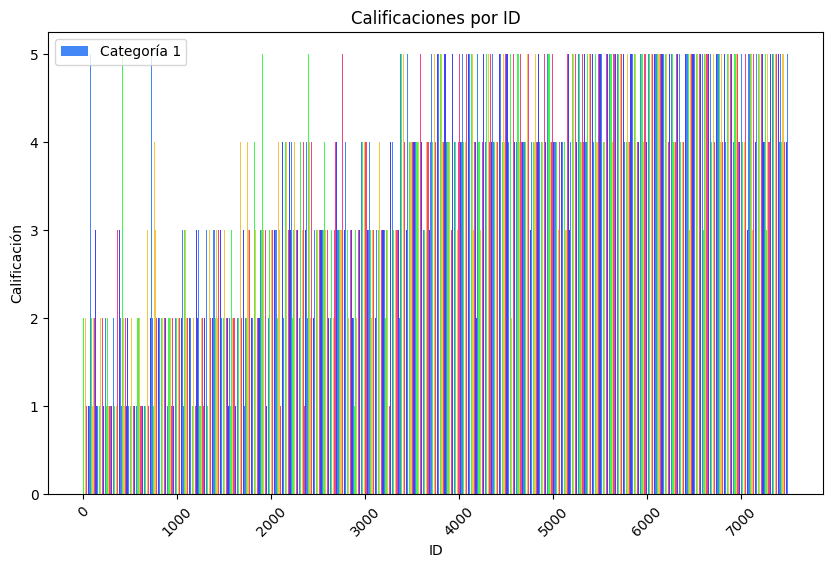

In [ ]:
import matplotlib.pyplot as plt

# Leer el archivo de texto
with open('Resultados_MeIA_DataThinkers.txt', 'r') as file:
    data = file.readlines()

# Separar los valores de id y calificación
ids = []
ratings = []
for line in data:
    values = line.split('\t')
    ids.append(int(values[0]))
    ratings.append(int(values[1]))

# Crear el gráfico de barras con ajustes adicionales
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura

# Personalizar colores y estilo de las barras
colors = ['#4287f5', '#42f551', '#f5c542', '#f5428a', '#4242f5']
plt.bar(ids, ratings, color=colors)

# Personalizar etiquetas de los ejes y título
plt.xlabel('ID')
plt.ylabel('Calificación')
plt.title('Calificaciones por ID')

# Rotar las etiquetas del eje x
plt.xticks(rotation=45)

# Mostrar la leyenda
categories = ['Categoría 1', 'Categoría 2', 'Categoría 3', 'Categoría 4', 'Categoría 5']
plt.legend(categories)

# Mostrar el gráfico
plt.show()



Pruebas

In [ ]:
text = "Un increible lugar para unas vacaciones, la unica cosa que no me gustó es que no habia jabon en los baños. por lo demas, es perfecto"
res = pi(text)
print(res)

[{'label': 'LABEL_3', 'score': 0.792111337184906}]
